In [53]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [54]:
data = pd.read_csv('Patient_records.csv')
data

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.00,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.00,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.00,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.00,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.00,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,A. 1 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-08-25 19:24:19.731946,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other
4996,1074.35,Other side pulled out of side road,H. 8 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-05-30 15:05:56.471294,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female
4997,2020.00,Other side pulled out of side road,F. 6 months,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-03-09 13:27:25.529105,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male
4998,781.20,Rear end - 3 car - Clt at front,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-02-09 05:32:42.392478,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female


<Axes: xlabel='AccidentType'>

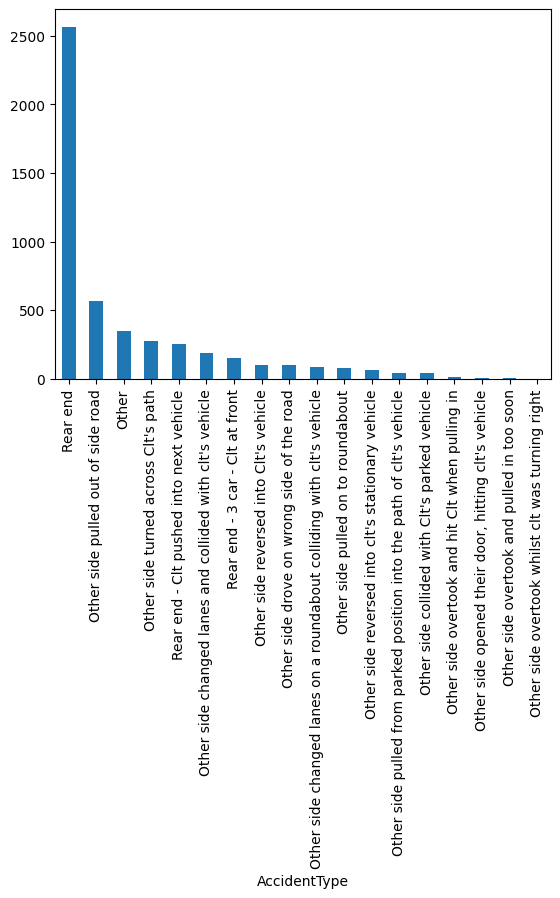

In [55]:
data['AccidentType'].value_counts().plot(kind='bar')

Accident Description
Hit a deer on the highway.            1053
Rear-ended at a stoplight.             994
Lost control on a snowy road.          953
Side collision at an intersection.     947
Swerved to avoid another vehicle.      933
NaN                                    120
Name: count, dtype: int64


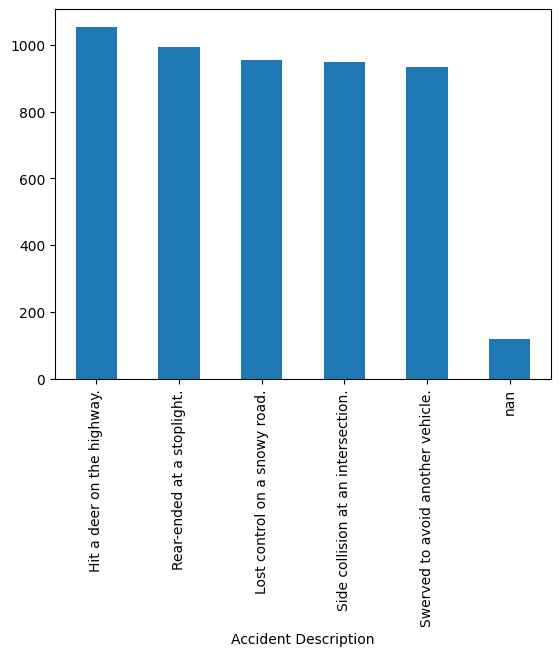

In [56]:
data['Accident Description'].value_counts(dropna=False).plot(kind='bar')
print(data['Accident Description'].value_counts(dropna=False))

Injury Description
Fractured arm and leg.          1067
Concussion and bruised ribs.     982
Sprained ankle and wrist.        954
Minor cuts and scrapes.          950
Whiplash and minor bruises.      928
Name: count, dtype: int64


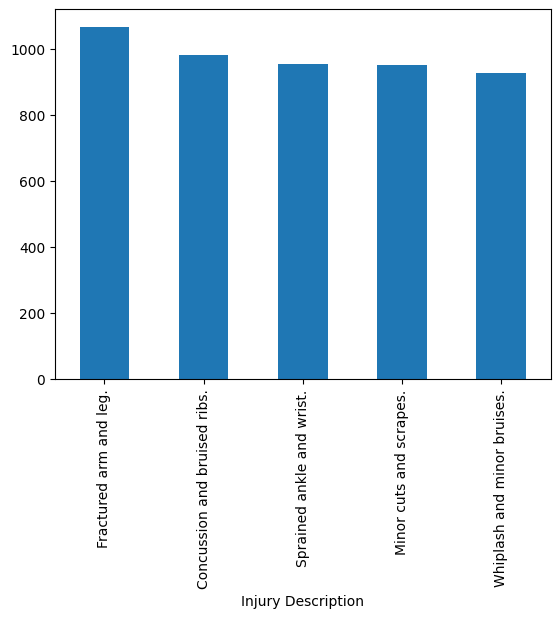

In [57]:
data['Injury Description'].value_counts().plot(kind='bar')
print(data['Injury Description'].value_counts())

In [58]:
data['Injury_Prognosis_Days'] = (
    data['Injury_Prognosis']
    .str.extract(r'(\d+)')
    .fillna(0)
    .astype(int) * 30
)
data['Injury_Prognosis'] = data['Injury_Prognosis_Days']
data

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender,Injury_Prognosis_Days
0,520.00,Rear end,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male,150
1,870.00,Rear end,60,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female,60
2,2140.00,Other side pulled out of side road,210,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female,210
3,520.00,Rear end - Clt pushed into next vehicle,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female,120
4,260.00,Rear end,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other,30
4996,1074.35,Other side pulled out of side road,240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female,240
4997,2020.00,Other side pulled out of side road,180,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male,180
4998,781.20,Rear end - 3 car - Clt at front,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female,120


In [59]:
data['Police Report Filed'] = data['Police Report Filed'].fillna(value = 'No')
data['Witness Present'] = data['Witness Present'].fillna(value = 'No')
data['Gender'] = data['Gender'].fillna(value = 'Other')
data['Exceptional_Circumstances'] = data['Exceptional_Circumstances'].fillna(value = 'No')
data['Minor_Psychological_Injury'] = data['Minor_Psychological_Injury'].fillna(value = 'No')
data['Whiplash'] = data['Whiplash'].fillna(value = 'No')

columns_to_BIN = ['Police Report Filed', 'Witness Present', 'Gender', 'Exceptional_Circumstances', 'Minor_Psychological_Injury', 'Whiplash']
swap= {"Yes": 1, "No": 0}
swap1 = {"Male": 1, "Female": 2, "Other": 0}

for col in columns_to_BIN:
    if col in ['Gender']:
        data[col] = data[col].map(swap1)
    else:
        data[col] = data[col].map(swap)
data


,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender,Injury_Prognosis_Days
0,520.00,Rear end,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,1,1,1,150
1,870.00,Rear end,60,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,1,1,2,60
2,2140.00,Other side pulled out of side road,210,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,1,0,2,210
3,520.00,Rear end - Clt pushed into next vehicle,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,1,1,2,120
4,260.00,Rear end,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,1,1,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,0,0,0,30
4996,1074.35,Other side pulled out of side road,240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,1,0,2,240
4997,2020.00,Other side pulled out of side road,180,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,0,1,1,180
4998,781.20,Rear end - 3 car - Clt at front,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,0,0,2,120


In [60]:
data.loc[:, ['Injury Description', 'Accident Description']] = data.loc[:, ['Injury Description', 'Accident Description']].fillna(value="Other")
swap = {"Fractured arm and leg." : 0, "Concussion and bruised ribs." : 1, "Sprained ankle and wrist." : 2, "Minor cuts and scrapes." : 3, "Whiplash and minor bruises." : 4, "Other" : 5}
swap1 = {"Hit a deer on the highway." : 0, "Rear-ended at a stoplight." : 1, "Lost control on a snowy road." : 2, "Side collision at an intersection." : 3, "Swerved to avoid another vehicle." : 4, "Other" : 5}

columns_to_BIN = ['Injury Description', 'Accident Description']

for col in columns_to_BIN:
    if col in ['Injury Description']:
        data[col] = data[col].map(swap)
    else:
        data[col] = data[col].map(swap1)

data

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender,Injury_Prognosis_Days
0,520.00,Rear end,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-06-11 11:22:24.508901,13.0,33.0,4.0,3,4,1,1,1,150
1,870.00,Rear end,60,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2024-01-09 00:55:01.140228,4.0,45.0,2.0,3,3,1,1,2,60
2,2140.00,Other side pulled out of side road,210,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-03-01 17:43:47.805561,9.0,45.0,4.0,2,4,1,0,2,210
3,520.00,Rear end - Clt pushed into next vehicle,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-13 04:36:32.118423,5.0,62.0,1.0,3,3,1,1,2,120
4,260.00,Rear end,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-14 05:13:07.117423,9.0,78.0,1.0,2,1,1,1,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022-06-30 19:24:19.731946,18.0,18.0,3.0,0,1,0,0,0,30
4996,1074.35,Other side pulled out of side road,240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-06-13 15:05:56.471294,NaN,70.0,4.0,3,0,1,0,2,240
4997,2020.00,Other side pulled out of side road,180,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-08-05 13:27:25.529105,11.0,43.0,1.0,4,3,0,1,1,180
4998,781.20,Rear end - 3 car - Clt at front,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-10-18 05:32:42.392478,10.0,69.0,1.0,2,2,0,0,2,120


In [61]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
display(data)

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender,Injury_Prognosis_Days
0,520.00,Rear end,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024-06-11 11:22:24.508901,13.0,33.0,4.0,3,4,1,1,1,150
1,870.00,Rear end,60,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2024-01-09 00:55:01.140228,4.0,45.0,2.0,3,3,1,1,2,60
2,2140.00,Other side pulled out of side road,210,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-03-01 17:43:47.805561,9.0,45.0,4.0,2,4,1,0,2,210
3,520.00,Rear end - Clt pushed into next vehicle,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-13 04:36:32.118423,5.0,62.0,1.0,3,3,1,1,2,120
4,260.00,Rear end,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-14 05:13:07.117423,9.0,78.0,1.0,2,1,1,1,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022-06-30 19:24:19.731946,18.0,18.0,3.0,0,1,0,0,0,30
4996,1074.35,Other side pulled out of side road,240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-06-13 15:05:56.471294,NaN,70.0,4.0,3,0,1,0,2,240
4997,2020.00,Other side pulled out of side road,180,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-08-05 13:27:25.529105,11.0,43.0,1.0,4,3,0,1,1,180
4998,781.20,Rear end - 3 car - Clt at front,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-10-18 05:32:42.392478,10.0,69.0,1.0,2,2,0,0,2,120


In [62]:
from datetime import datetime

def parse_date(date_val):
    if isinstance(date_val, (datetime, pd.Timestamp)):
        return date_val
    if pd.isna(date_val):
        return pd.NaT
    if isinstance(date_val, (float, int)):
        return pd.NaT
    try:
        return datetime.strptime(date_val, '%Y-%m-%dT%H:%M:%S.%fZ')
    except ValueError:
        try:
            return datetime.strptime(date_val, '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            try:
                return datetime.strptime(date_val, '%Y-%m-%d')
            except ValueError:
                return pd.NaT

data['Accident Date'] = data['Accident Date'].apply(parse_date)
data['Claim Date'] = data['Claim Date'].apply(parse_date)
data['Days Until Claimed'] = (data['Claim Date'] - data['Accident Date']).dt.total_seconds() / (24*60*60)

data

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender,Injury_Prognosis_Days,Days Until Claimed
0,520.00,Rear end,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,33.0,4.0,3,4,1,1,1,150,214.0
1,870.00,Rear end,60,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,4.0,45.0,2.0,3,3,1,1,2,60,198.0
2,2140.00,Other side pulled out of side road,210,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,9.0,45.0,4.0,2,4,1,0,2,210,7.0
3,520.00,Rear end - Clt pushed into next vehicle,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,62.0,1.0,3,3,1,1,2,120,11.0
4,260.00,Rear end,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,78.0,1.0,2,1,1,1,0,90,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,3.0,0,1,0,0,0,30,309.0
4996,1074.35,Other side pulled out of side road,240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,70.0,4.0,3,0,1,0,2,240,14.0
4997,2020.00,Other side pulled out of side road,180,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,11.0,43.0,1.0,4,3,0,1,1,180,149.0
4998,781.20,Rear end - 3 car - Clt at front,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,69.0,1.0,2,2,0,0,2,120,251.0


In [20]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('Patient_Records.csv')

# Drop rows with missing target values
data = data.dropna(subset=['SettlementValue'])

# Preprocessing steps:
# Encode AccidentType
label_encoder = LabelEncoder()
data['AccidentTypeEncoded'] = label_encoder.fit_transform(data['AccidentType'])

# Convert 'Injury_Prognosis' to numeric days
data['Injury_Prognosis_Days'] = data['Injury_Prognosis'].str.extract(r'(\d+)').fillna(0).astype(int) * 30

# Select features and target variable
X = data[['AccidentTypeEncoded', 'Injury_Prognosis_Days', 'Driver Age', 'Vehicle Age', 'Number of Passengers']]
y = data['SettlementValue']

# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")



Mean Squared Error: 565216.2622949901
R-squared Score: 0.2522680986005389


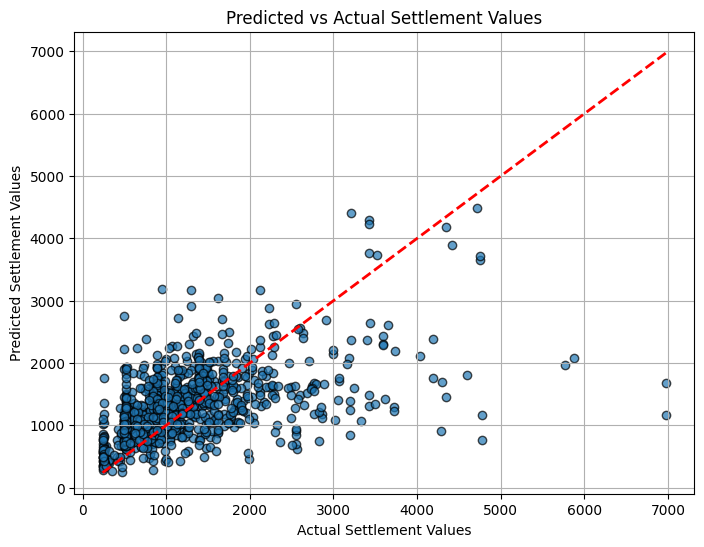

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Settlement Values")
plt.ylabel("Predicted Settlement Values")
plt.title("Predicted vs Actual Settlement Values")
plt.grid(True)
plt.show()